<a href="https://colab.research.google.com/github/Megancodes2017/Megancodes2017/blob/main/Phillies_vs_Pitch_Types_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pybaseball

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.1/426.1 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 432.7/432.7 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 32.7 MB/s eta 0:00:00


In [2]:
from pybaseball import statcast_batter, playerid_lookup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [3]:
phillies_hitters = [
    'Kyle Schwarber',
    'Trea Turner',
    'Bryce Harper',
    'J.T. Realmuto',
    'Nick Castellanos',
    'Max Kepler',
    'Brandon Marsh',
    'Harrison Bader',
    'Bryson Stott',
    'Alec Bohm',
    'Weston Wilson',
    'Otto Kemp',
    'Edmundo Sosa',
]

# Function to get MLBAM ID
def get_mlbam_id(first_name, last_name):
  player = playerid_lookup(last_name, first_name)
  player_id = player.loc[player['key_mlbam'].notnull(), 'key_mlbam'].values
  if len(player_id) > 0:
    return player_id[0]
  else:
    return None

# Pitch type mapping
pitch_map = {
    'FF': 'Four-Seam Fastball',
    'SL': 'Slider',
    'CH': 'Changeup',
    'CU': 'Curveball',
    'FC': 'Cutter',
    'SI': 'Sinker'
}

# Function to summarize hitter
def summarize_hitter_vs_pitch(df):
  df = df.copy()
  df['pitch_group'] = df['pitch_type'].map(pitch_map)
  # Drop unknown pitch types
  df = df[df['pitch_group'].notna()]


  summary = df.groupby('pitch_group').agg(
      PA = ('events', 'count'),
      xwOBA = ('estimated_woba_using_speedangle', 'mean'),
      HardHitRate = ('launch_speed', lambda x: (x >= 95).mean()),
      WhiffRate = ('description', lambda x: (x.str.contains('swinging_strike')).mean())
  ).reset_index()
  return summary

# Loop through all hitters
team_data = pd.DataFrame()

for name in phillies_hitters:
  first, last = name.split(" ", 1)
  mlbam_id = get_mlbam_id(first, last)

  if mlbam_id:
    print(f'Pulling data for {name}...')
    try:
      #Pull 2025 data
      player_data = statcast_batter('2025-03-20', '2025-09-30', mlbam_id)
      summary = summarize_hitter_vs_pitch(player_data)
      summary['player'] = name
      team_data = pd.concat([team_data, summary])
      time.sleep(1)
    except Exception as e:
      print(f'Error for {name}: {e}')
  else:
    print(f'MLBAM ID not found for {name}')


# Reset index
team_data.reset_index(drop=True, inplace=True)

Gathering player lookup table. This may take a moment.
Pulling data for Kyle Schwarber...
Gathering Player Data
Pulling data for Trea Turner...
Gathering Player Data
Pulling data for Bryce Harper...
Gathering Player Data
MLBAM ID not found for J.T. Realmuto
Pulling data for Nick Castellanos...
Gathering Player Data
Pulling data for Max Kepler...
Gathering Player Data
Pulling data for Brandon Marsh...
Gathering Player Data
Pulling data for Harrison Bader...
Gathering Player Data
Pulling data for Bryson Stott...
Gathering Player Data
Pulling data for Alec Bohm...
Gathering Player Data
Pulling data for Weston Wilson...
Gathering Player Data
Pulling data for Otto Kemp...
Gathering Player Data
Pulling data for Edmundo Sosa...
Gathering Player Data


In [4]:
display(team_data)

,pitch_group,PA,xwOBA,HardHitRate,WhiffRate,player
0,Changeup,79,0.411738,0.102389,0.136519,Kyle Schwarber
1,Curveball,65,0.300905,0.057762,0.148014,Kyle Schwarber
2,Cutter,48,0.493433,0.123404,0.131915,Kyle Schwarber
3,Four-Seam Fastball,209,0.484918,0.108108,0.109337,Kyle Schwarber
4,Sinker,116,0.510128,0.133891,0.058577,Kyle Schwarber
...,...,...,...,...,...,...
67,Curveball,19,0.244105,0.140625,0.203125,Edmundo Sosa
68,Cutter,15,0.179933,0.088235,0.147059,Edmundo Sosa
69,Four-Seam Fastball,70,0.324066,0.083045,0.096886,Edmundo Sosa
70,Sinker,47,0.370562,0.078534,0.047120,Edmundo Sosa


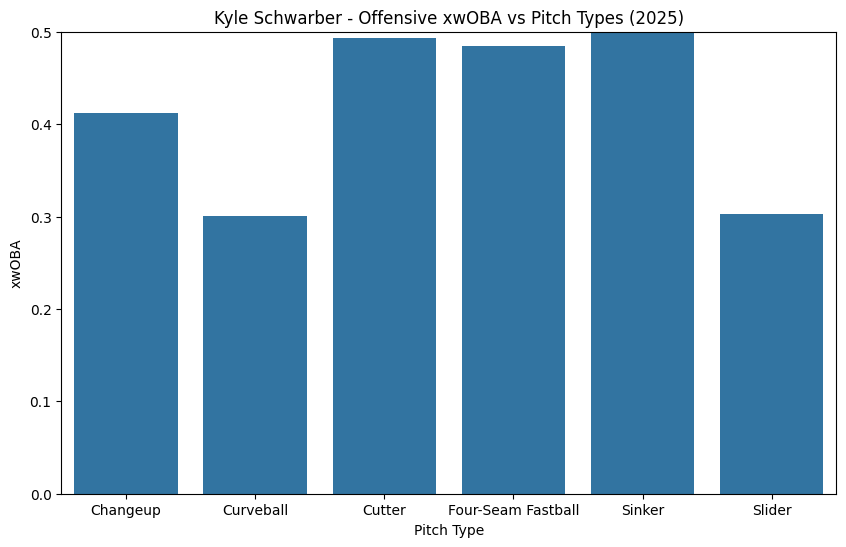

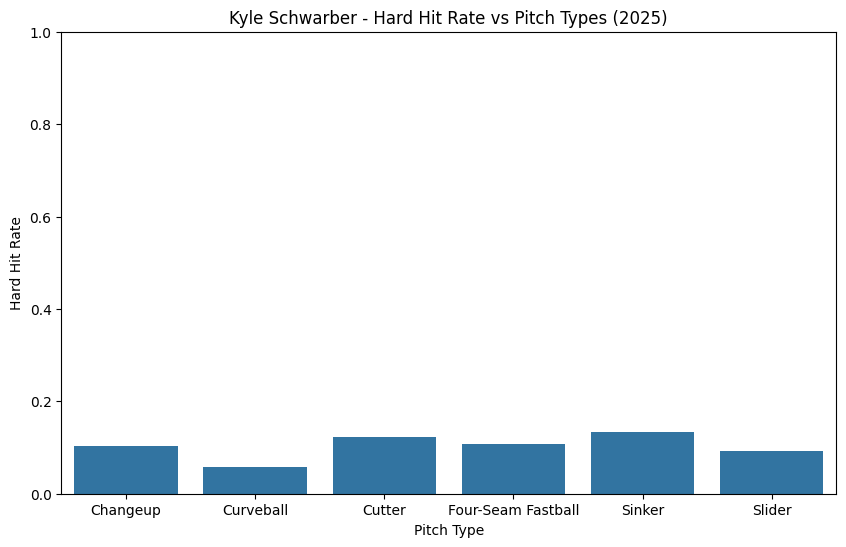

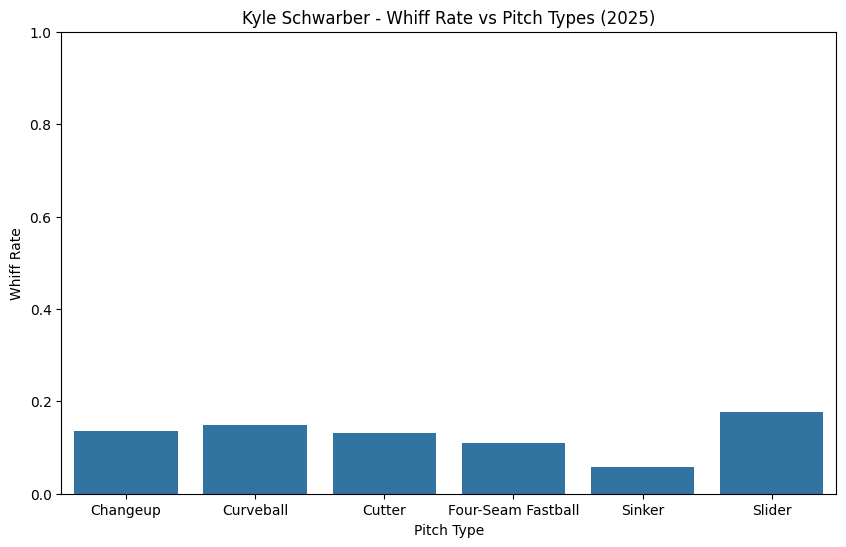

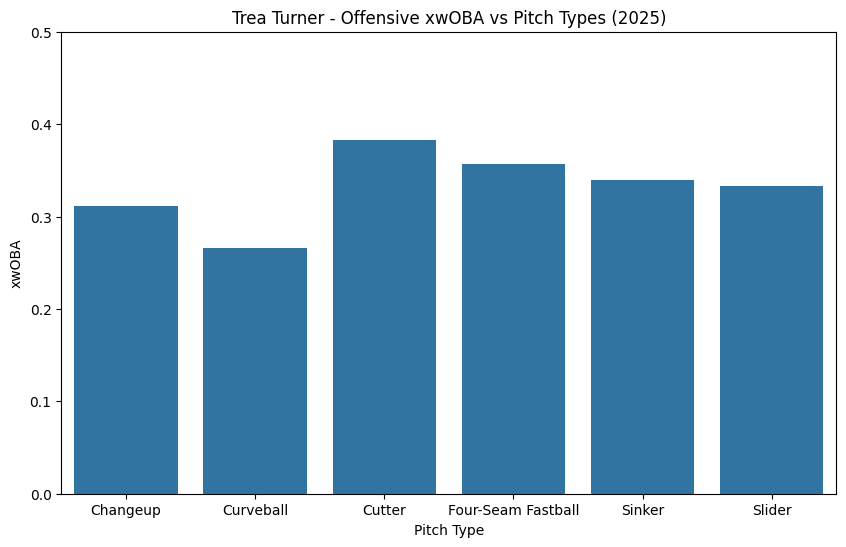

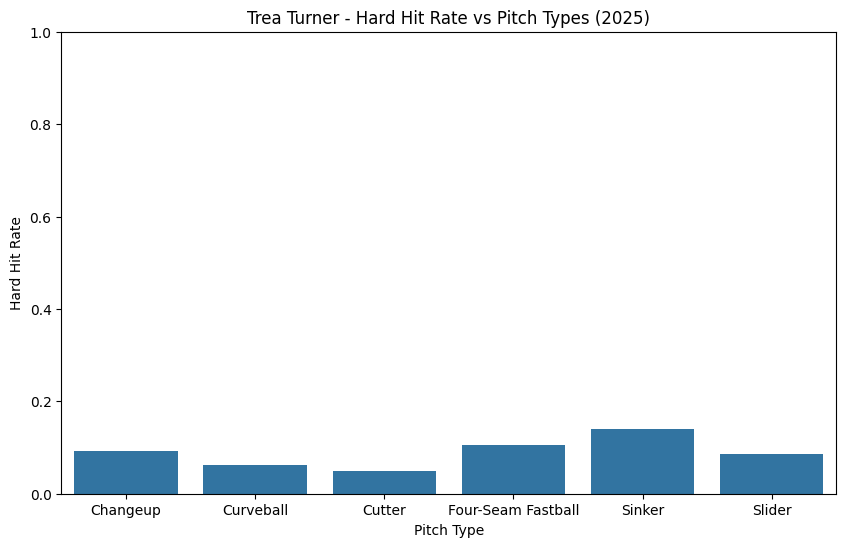

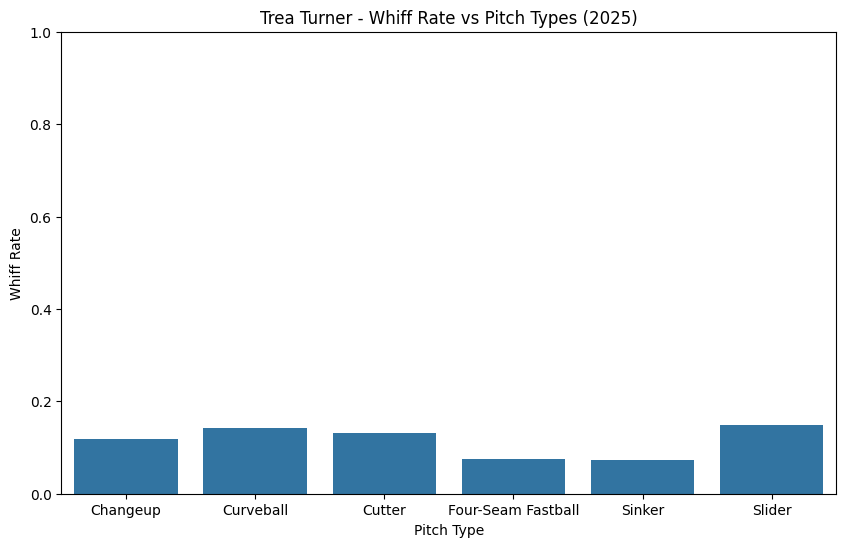

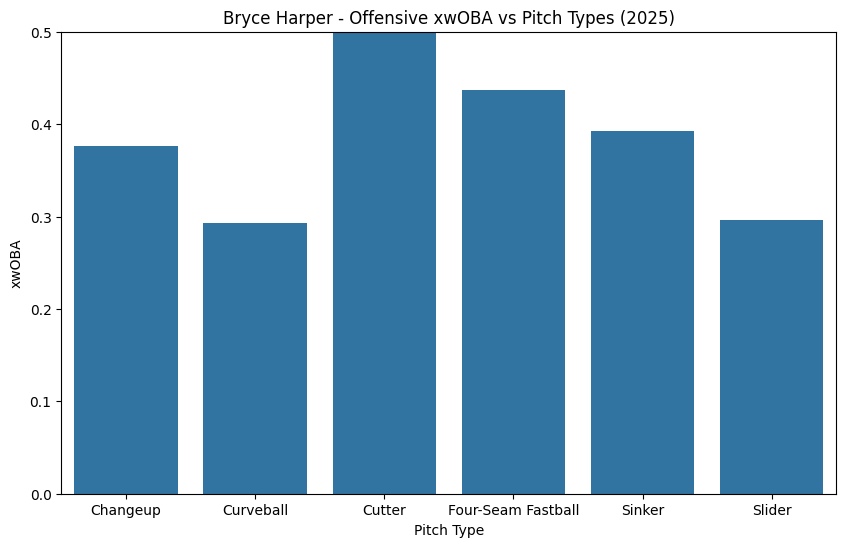

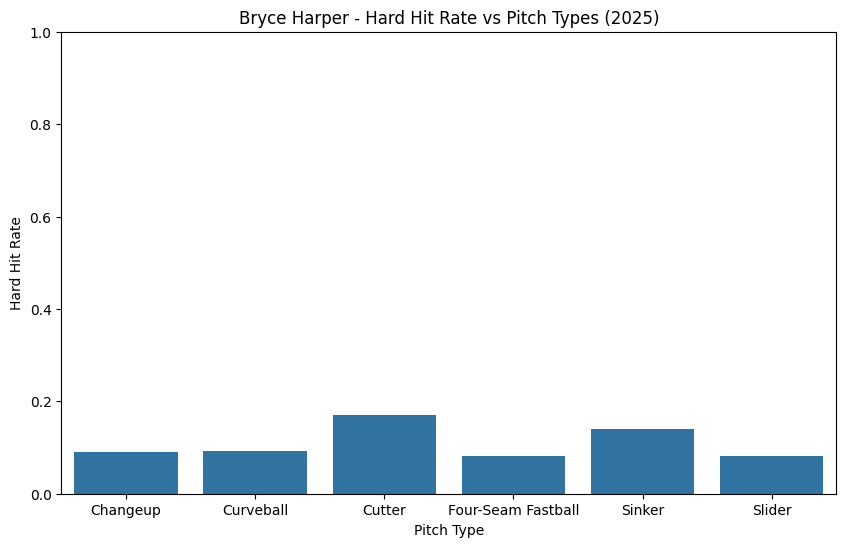

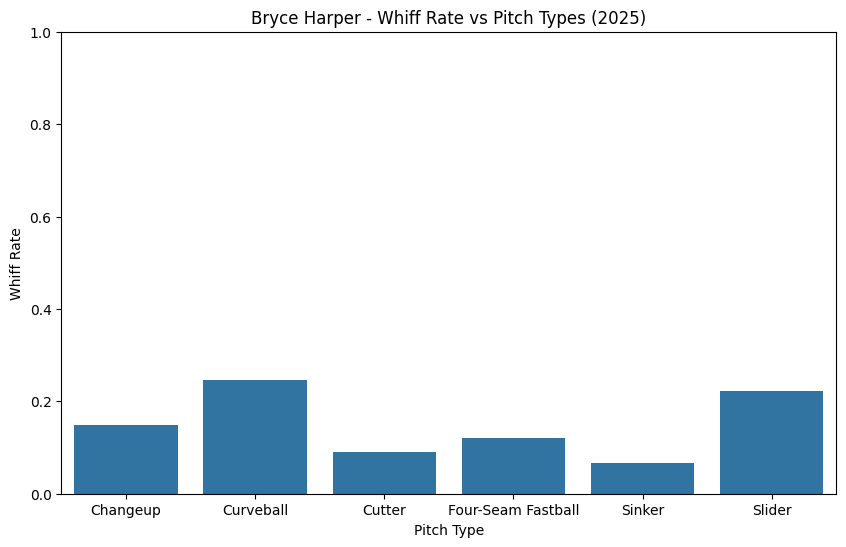

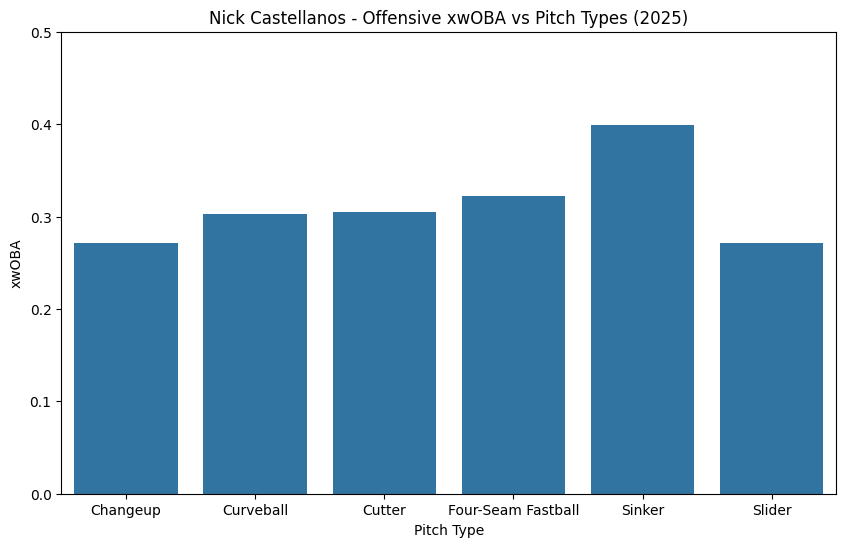

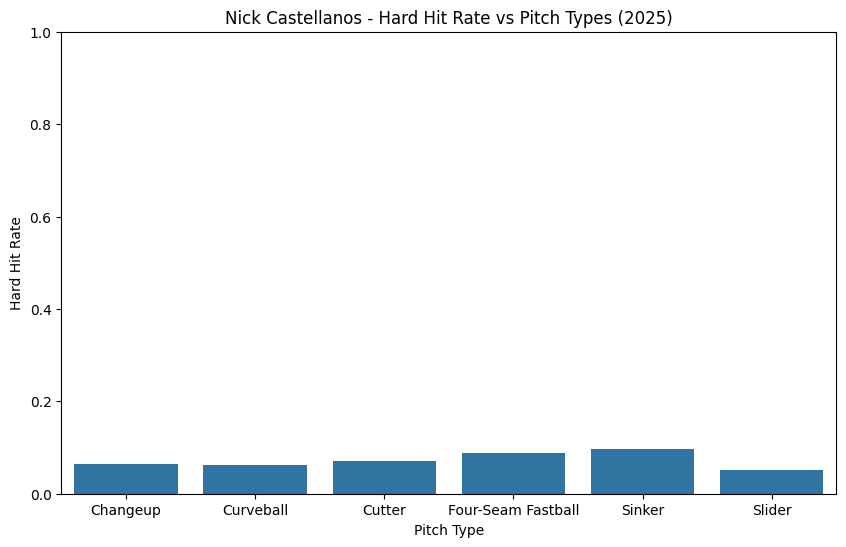

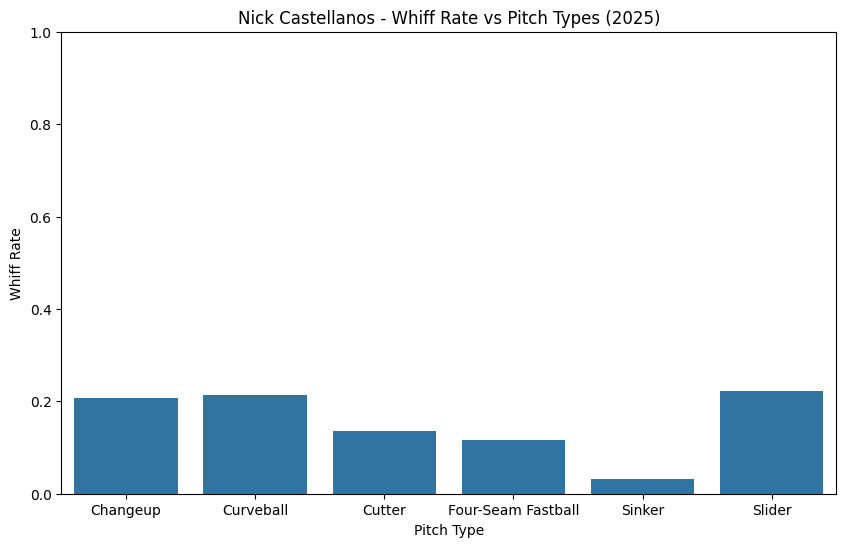

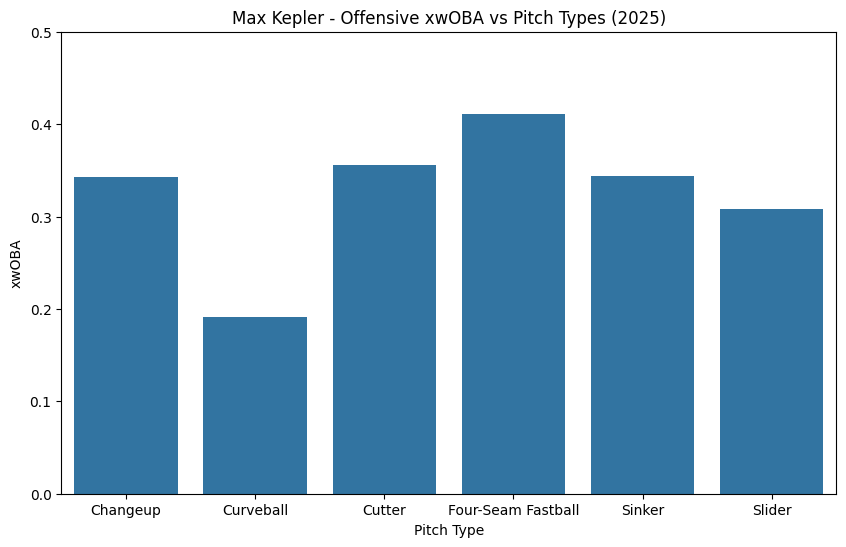

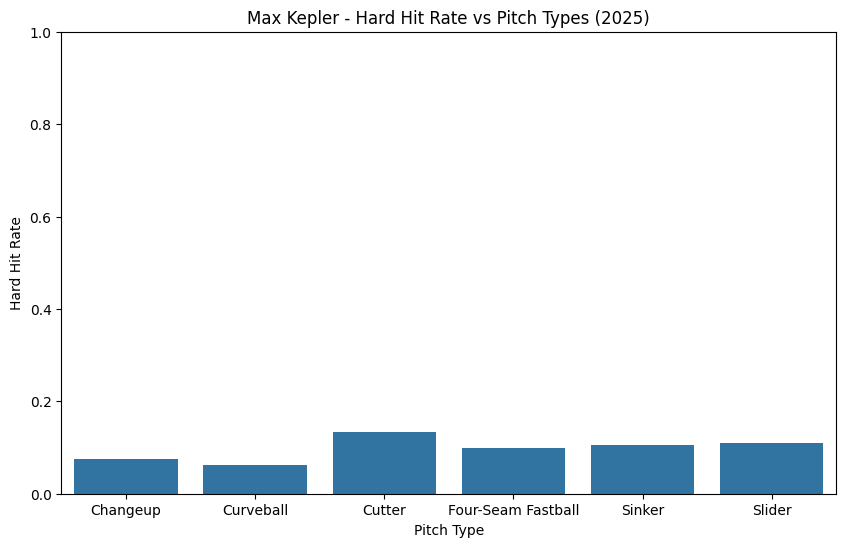

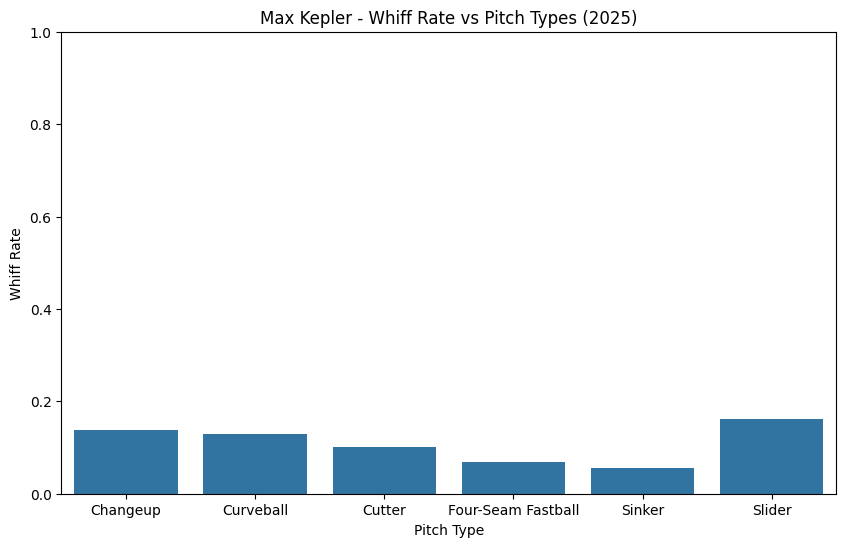

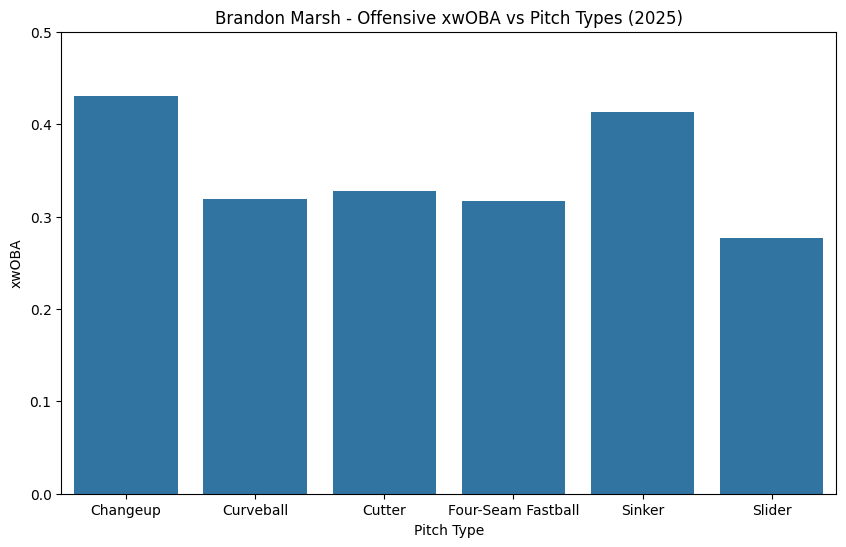

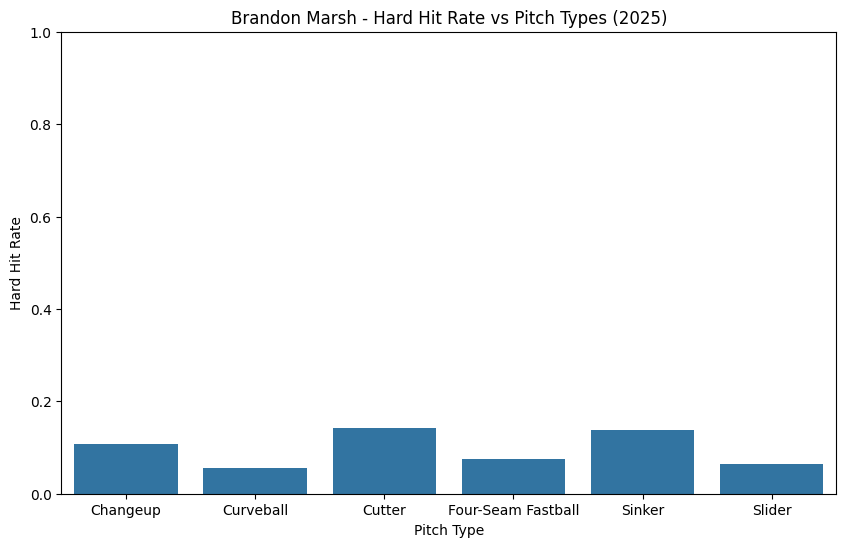

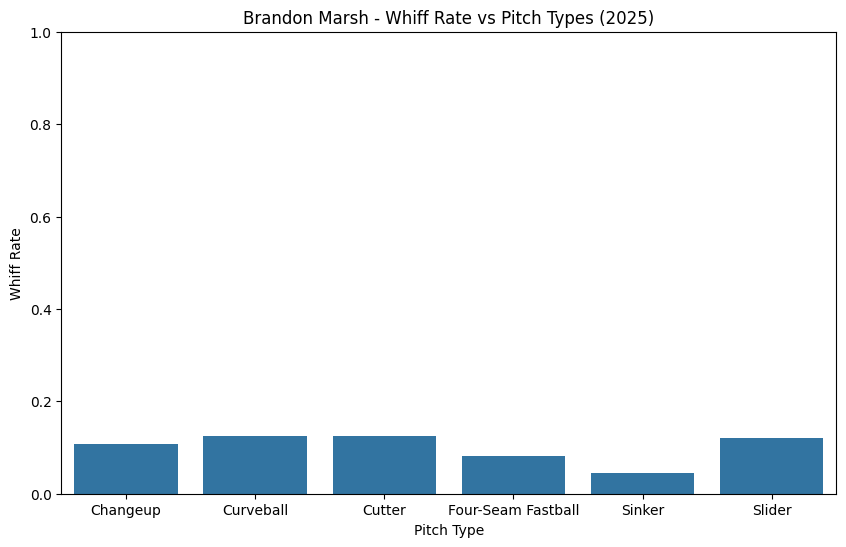

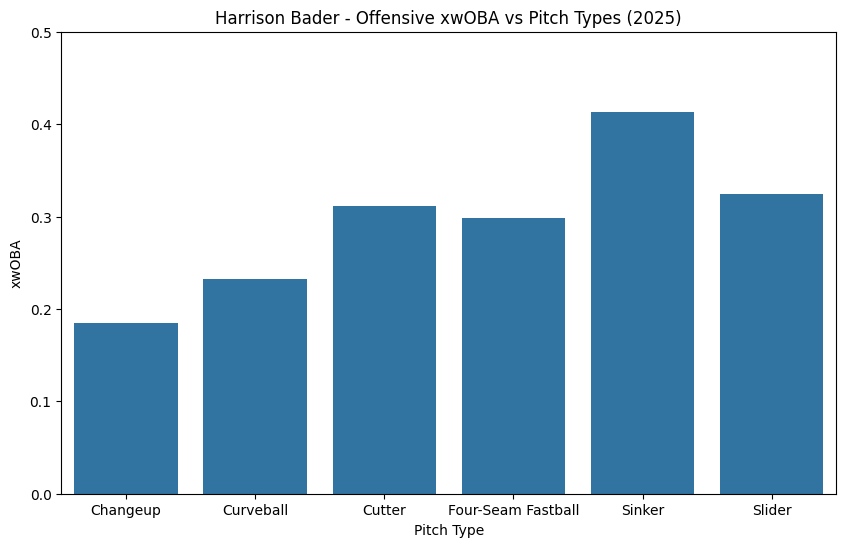

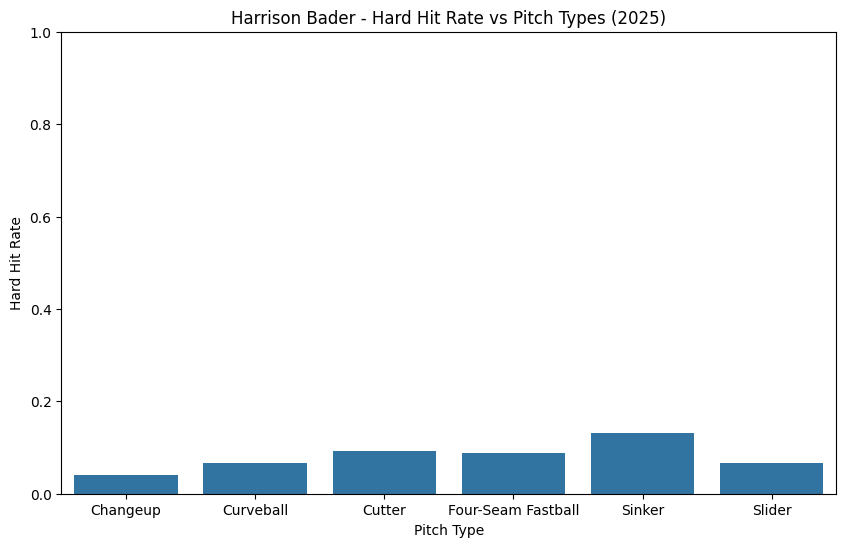

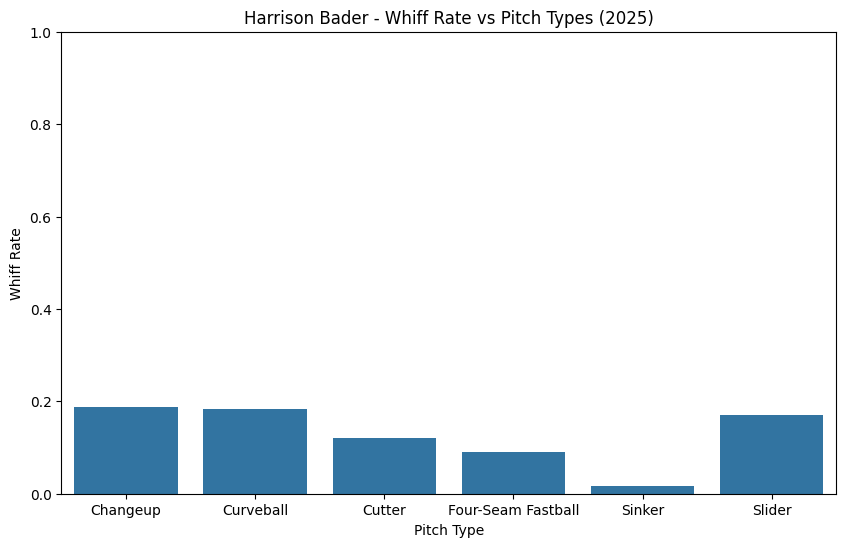

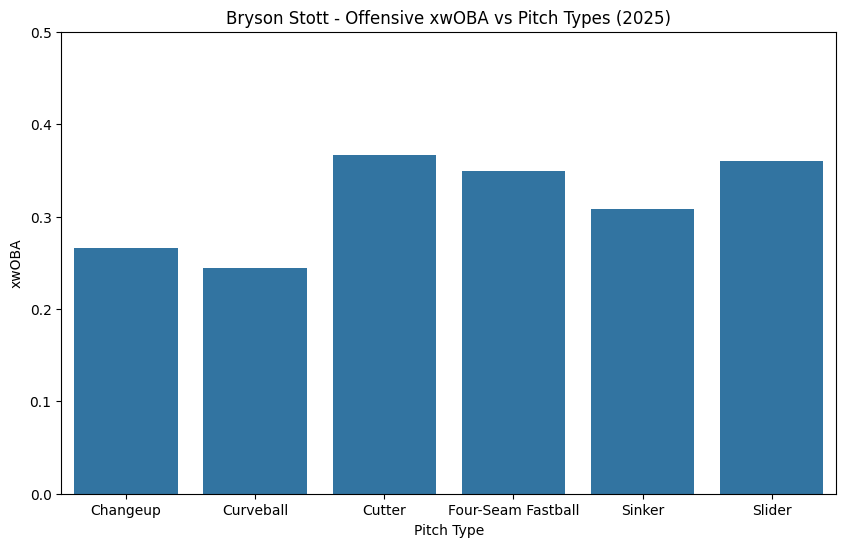

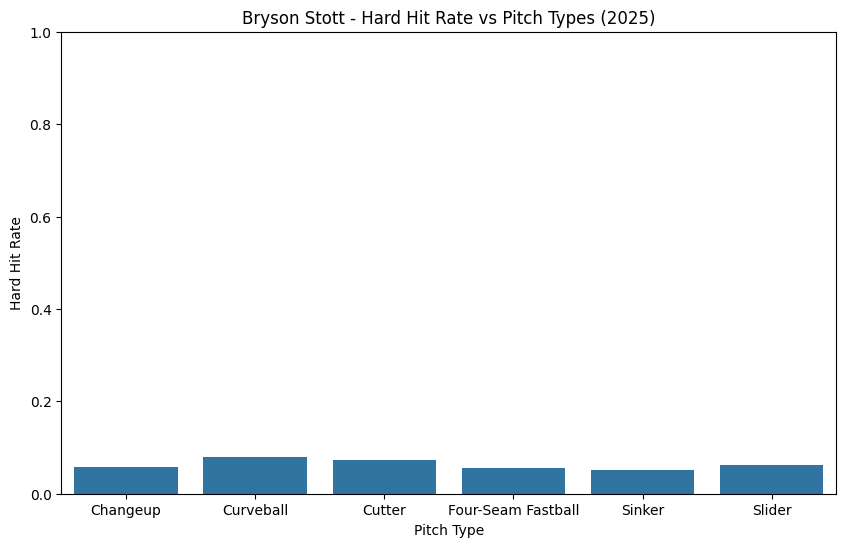

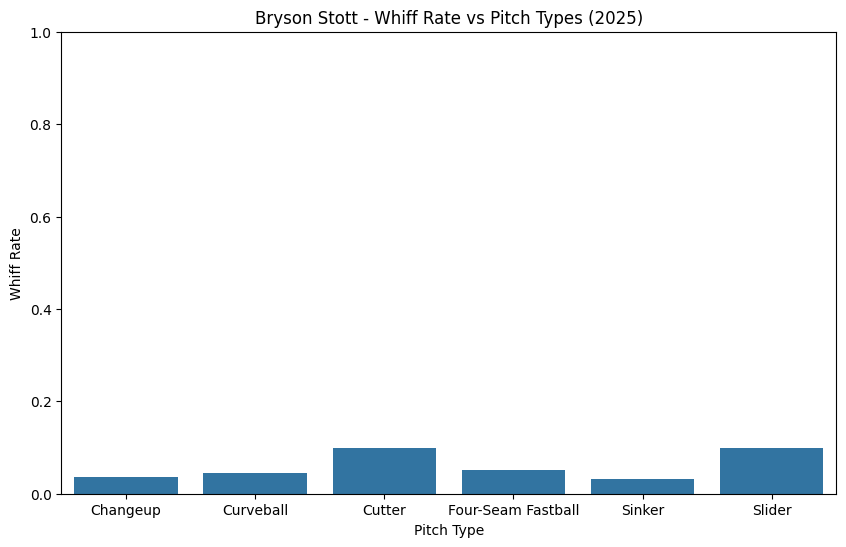

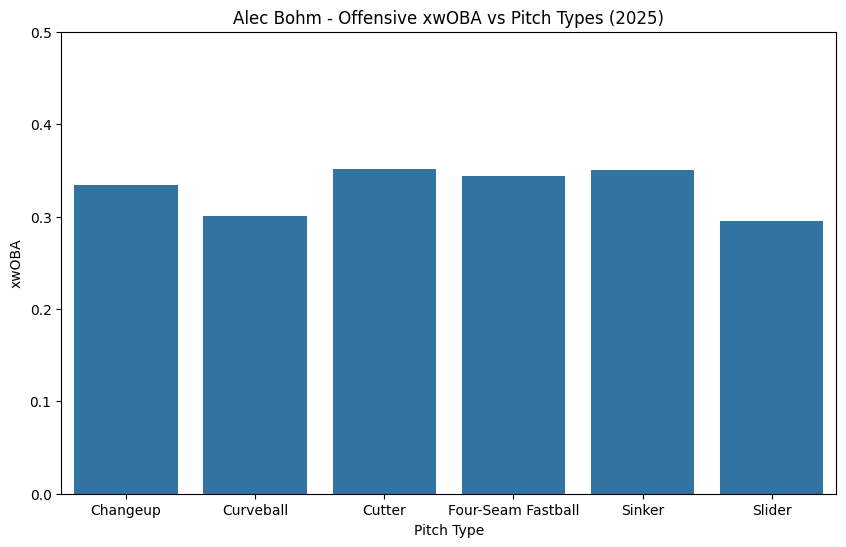

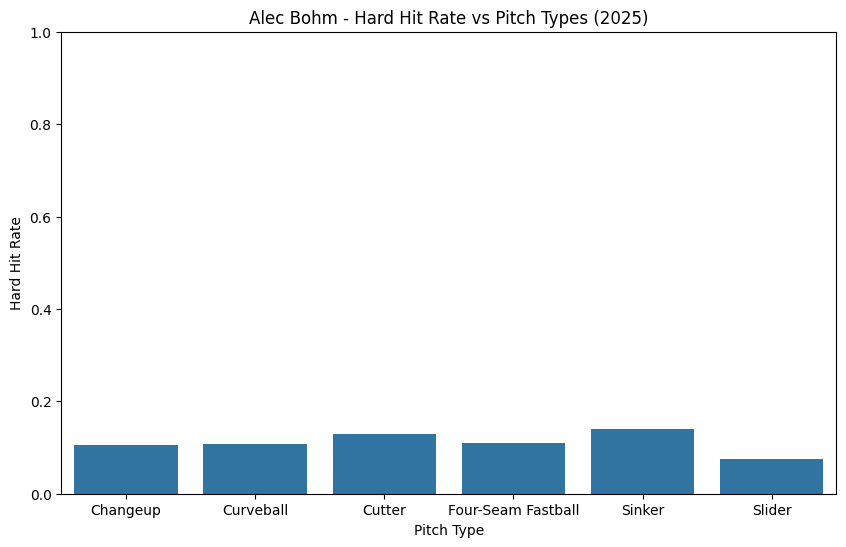

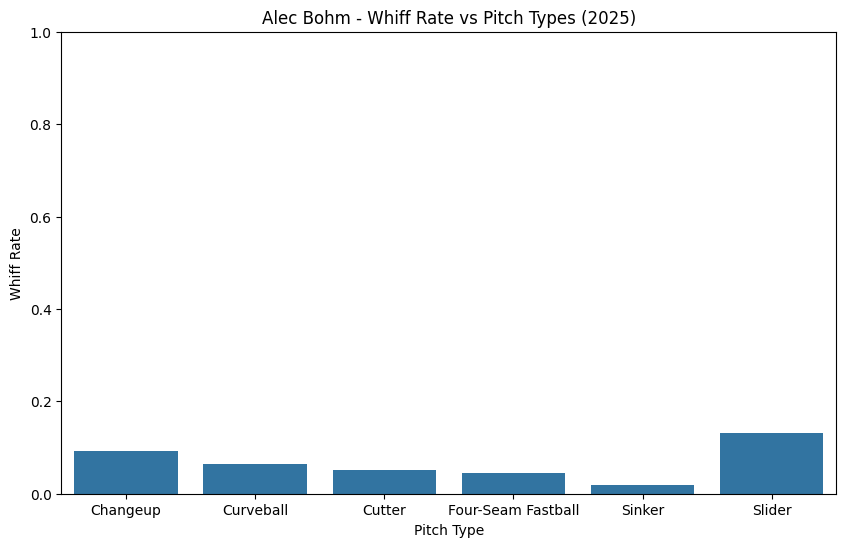

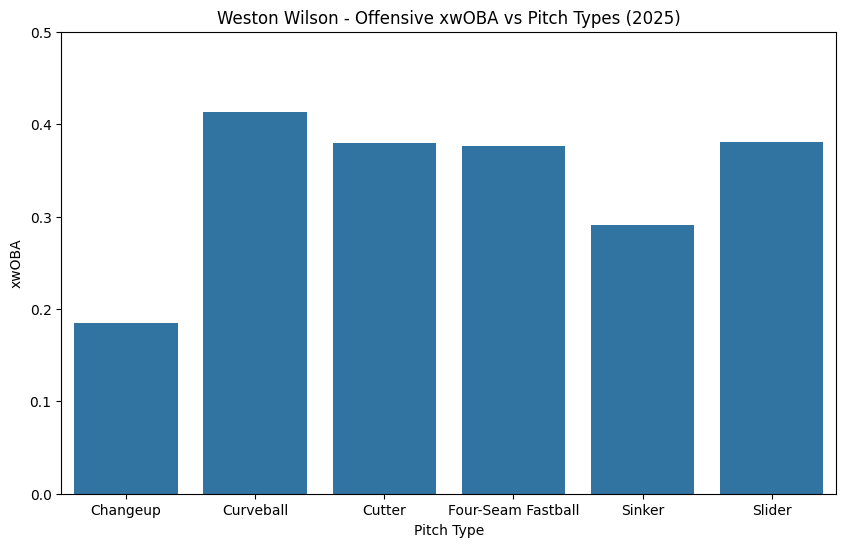

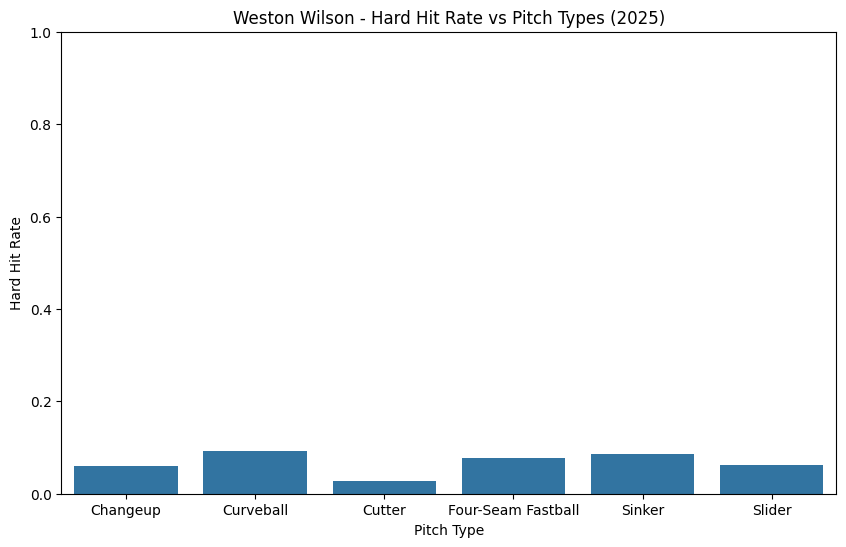

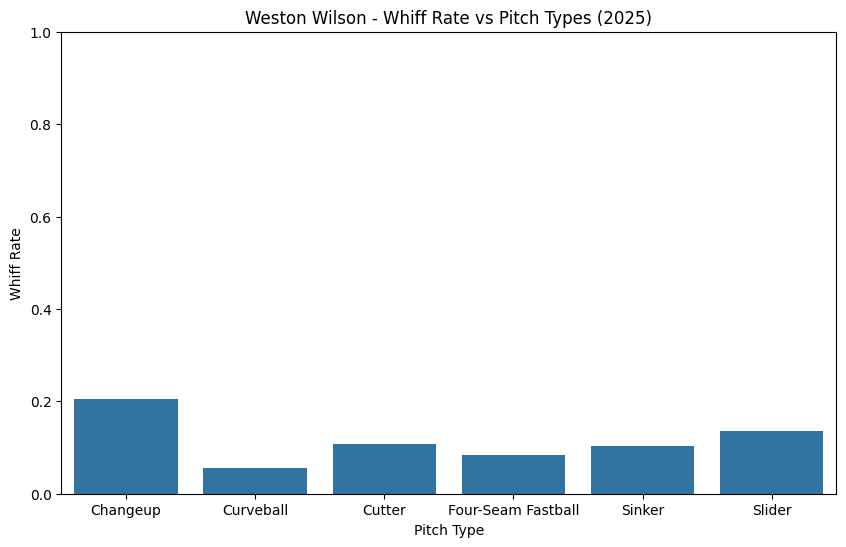

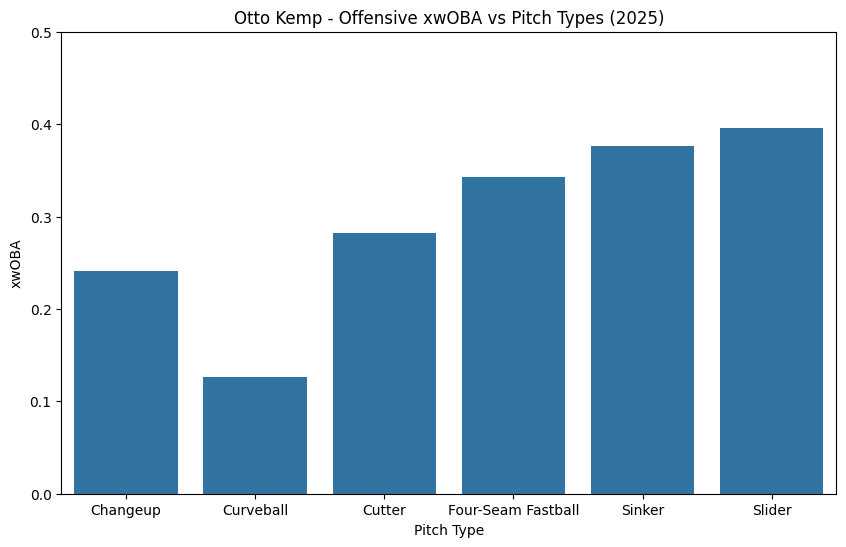

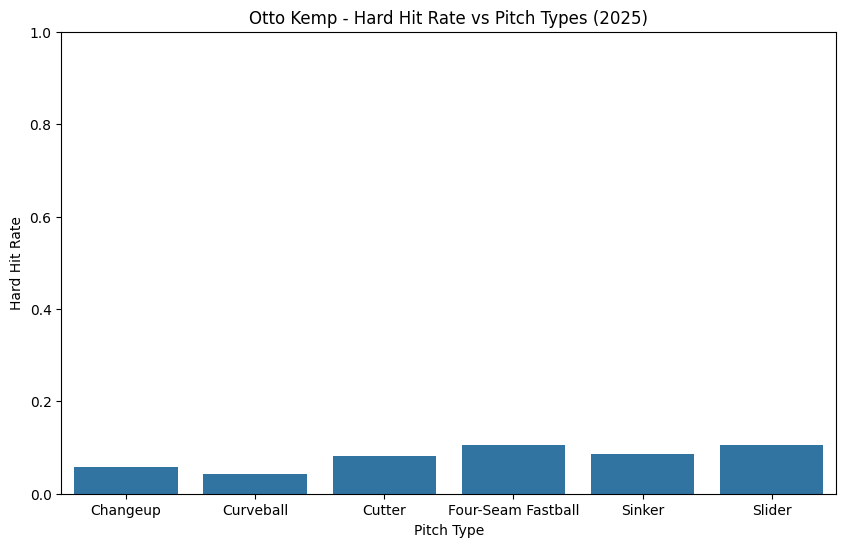

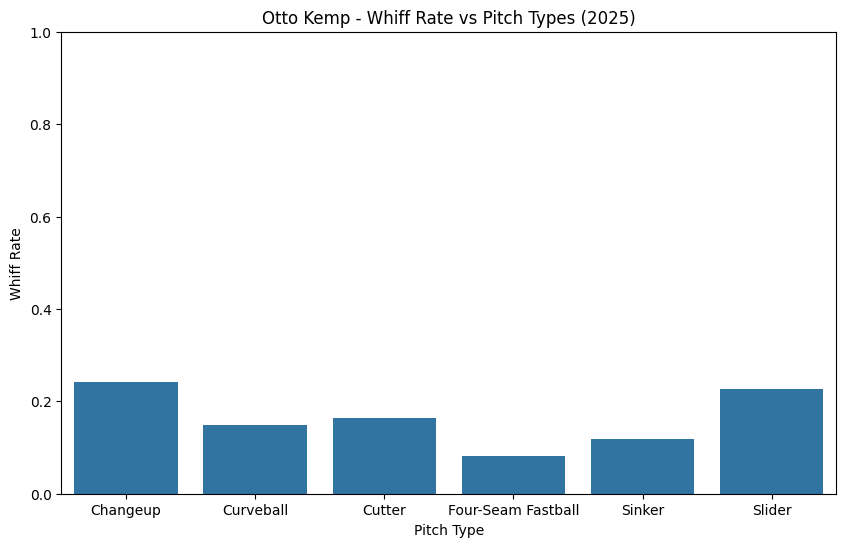

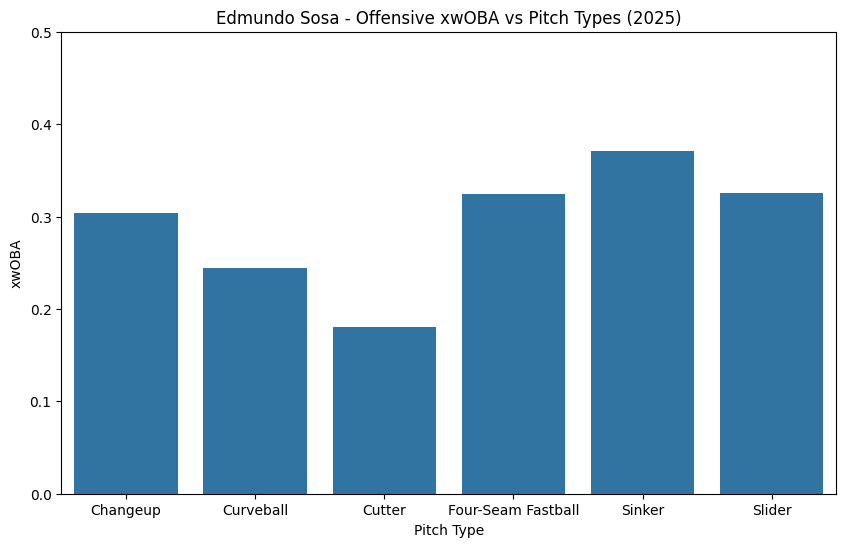

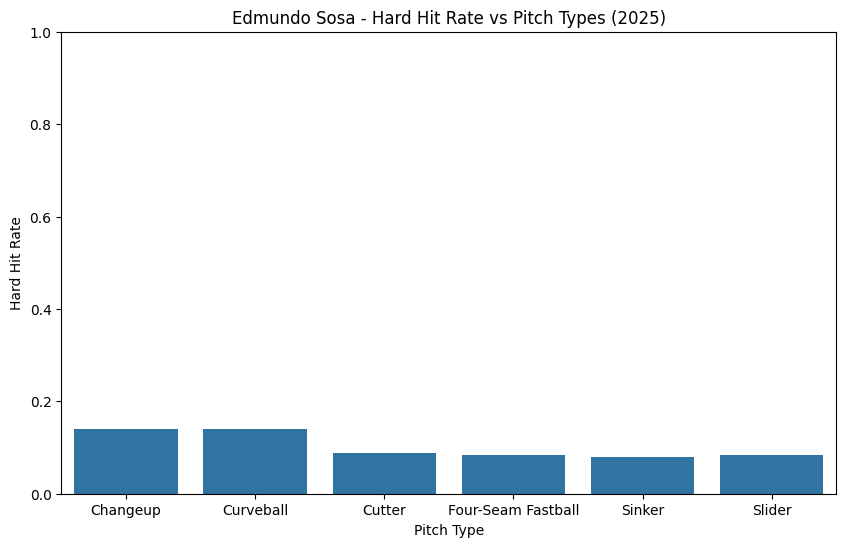

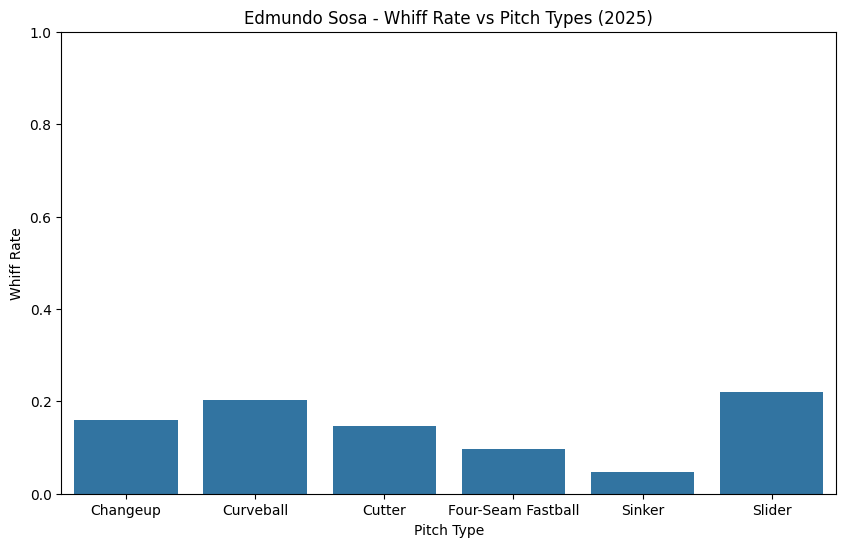

In [5]:
# Visualization per hitter
metrics = ['xwOBA', 'HardHitRate', 'WhiffRate']

for player in team_data['player'].unique():
  player_data = team_data[team_data['player'] == player]
  plt.figure(figsize=(10, 6))
  sns.barplot(data=player_data, x='pitch_group', y='xwOBA')
  plt.title(f'{player} - Offensive xwOBA vs Pitch Types (2025)')
  plt.ylabel('xwOBA')
  plt.xlabel('Pitch Type')
  plt.ylim(0, 0.5)
  plt.show()

  plt.figure(figsize=(10, 6))
  sns.barplot(data=player_data, x='pitch_group', y='HardHitRate')
  plt.title(f'{player} - Hard Hit Rate vs Pitch Types (2025)')
  plt.ylabel('Hard Hit Rate')
  plt.xlabel('Pitch Type')
  plt.ylim(0, 1)
  plt.show()

  plt.figure(figsize=(10, 6))
  sns.barplot(data=player_data, x='pitch_group', y='WhiffRate')
  plt.title(f'{player} - Whiff Rate vs Pitch Types (2025)')
  plt.ylabel('Whiff Rate')
  plt.xlabel('Pitch Type')
  plt.ylim(0, 1)
  plt.show()




In [6]:
# Radar chart
from pybaseball import statcast_batter, playerid_lookup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

In [7]:
# Phillies hitters
phillies_hitters = [
    'Kyle Schwarber',
    'Trea Turner',
    'Bryce Harper',
    'J.T. Realmuto',
    'Nick Castellanos',
    'Max Kepler',
    'Brandon Marsh',
    'Harrison Bader',
    'Bryson Stott',
    'Alec Bohm',
    'Weston Wilson',
    'Otto Kemp',
    'Edmundo Sosa',
]

# Function to get MLBAM ID
def get_mlbam_id(first_name, last_name):
  player = playerid_lookup(last_name, first_name)
  player_id = player.loc[player['key_mlbam'].notnull(), 'key_mlbam'].values
  return player_id[0] if len(player_id) > 0 else None

  # Pitch type mapping
  pitch_map = {
      'FF': 'Four-Seam Fastball',
      'SL': 'Slider',
      'CH': 'Changeup',
      'CU': 'Curveball',
      'FC': 'Cutter',
      'SI': 'Sinker'
  }

  # Summarize hitter vs pitch type
  def summarize_hitter_vs_pitch(df):
    df = df.copy()
    df['pitch_group'] = df['pitch_type'].map(pitch_map)
    df = df[df['pitch_group'].notna()]  # Drop unmapped pitch types

    summary = df.groupby('pitch_group').agg(
        PA = ('events', 'count'),
        xwOBA = ('estimated_woba_using_speedangle', 'mean'),
        HardHitRate = ('launch_speed', lambda x: (x >= 95).mean()),
        WhiffRate = ('description', lambda x: (x.str.contains('swinging_strike')).mean())
    ).reset_index()
    return summary


Pulling data for Kyle Schwarber...
Gathering Player Data


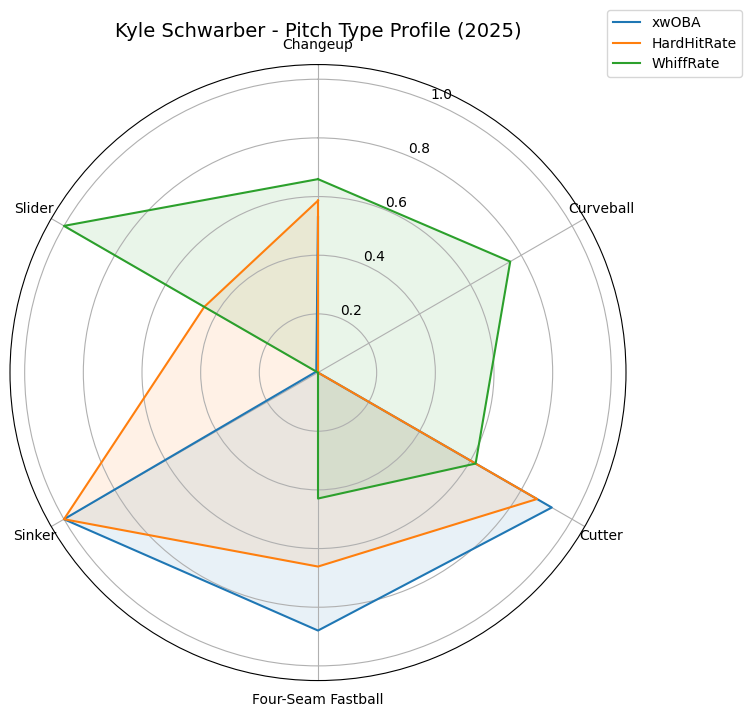

Pulling data for Trea Turner...
Gathering Player Data


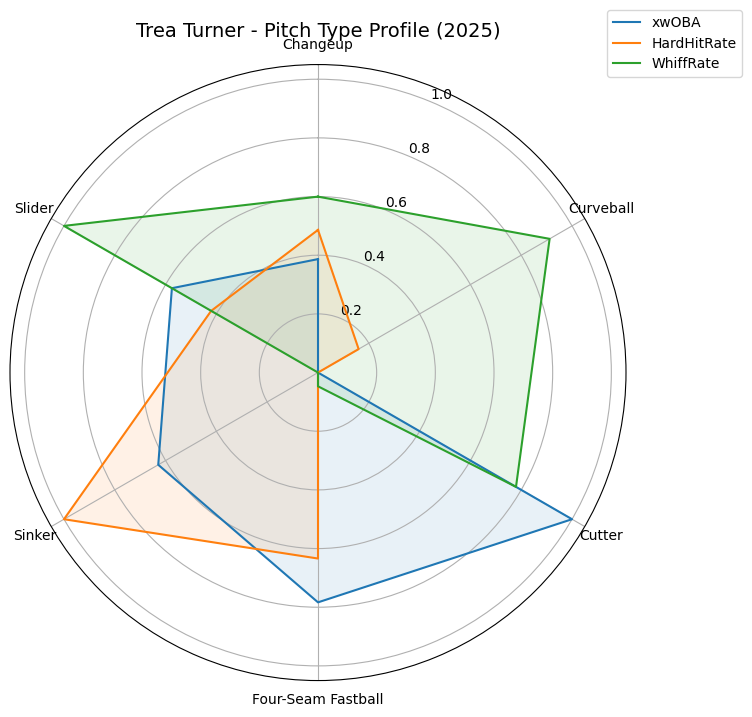

Pulling data for Bryce Harper...
Gathering Player Data


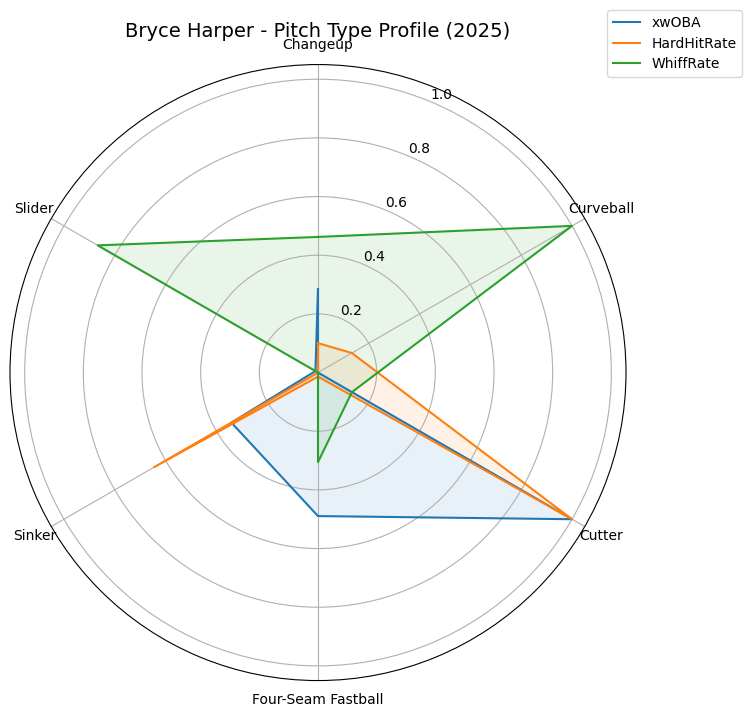

MLBAM ID not found for J.T. Realmuto
Pulling data for Nick Castellanos...
Gathering Player Data


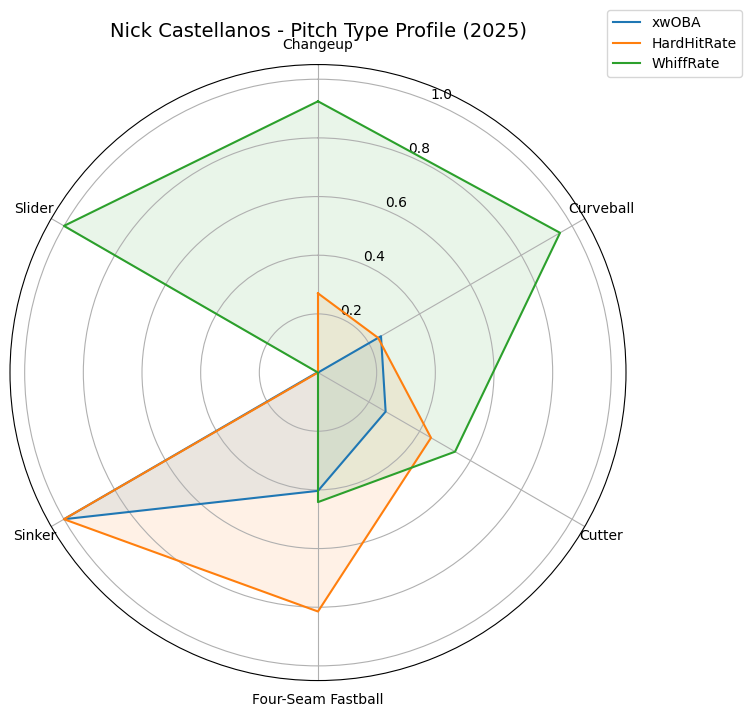

Pulling data for Max Kepler...
Gathering Player Data


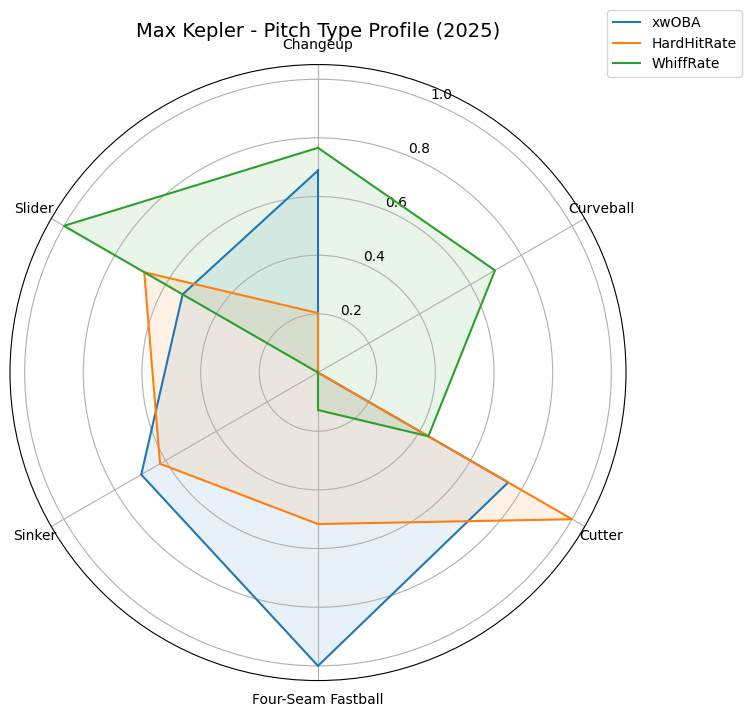

Pulling data for Brandon Marsh...
Gathering Player Data


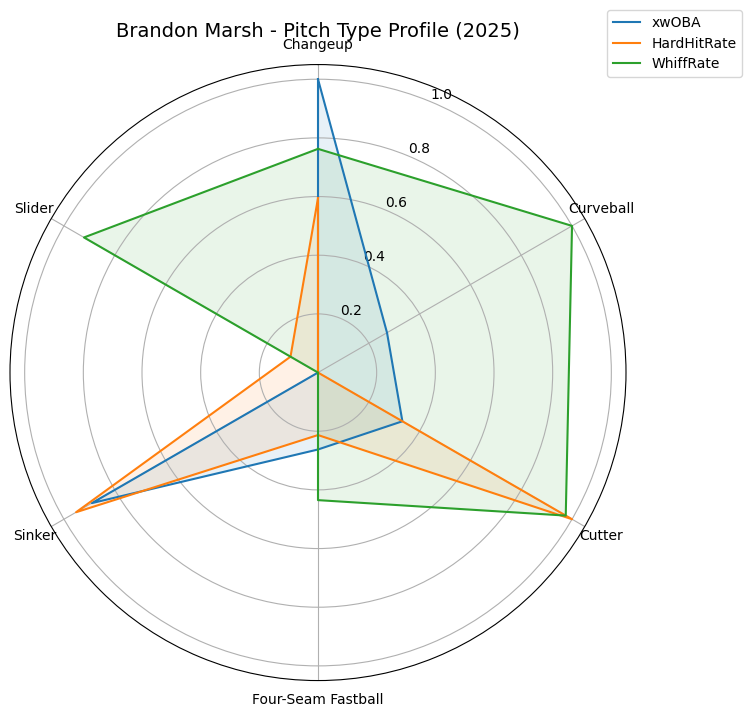

Pulling data for Harrison Bader...
Gathering Player Data


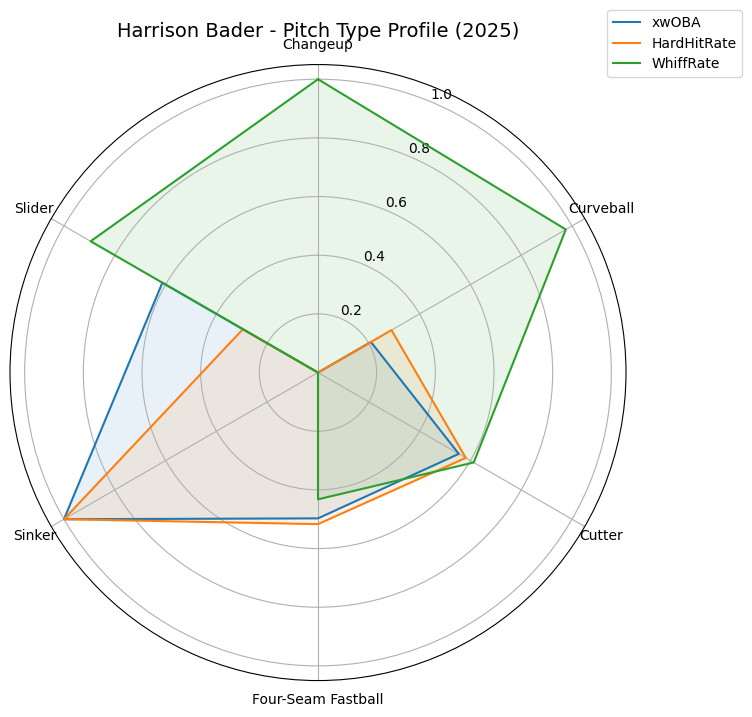

Pulling data for Bryson Stott...
Gathering Player Data


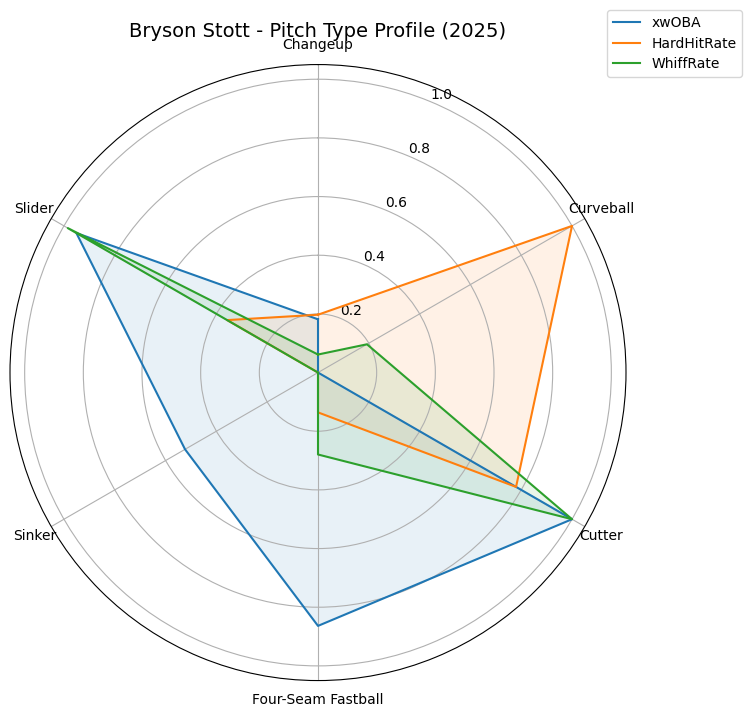

Pulling data for Alec Bohm...
Gathering Player Data


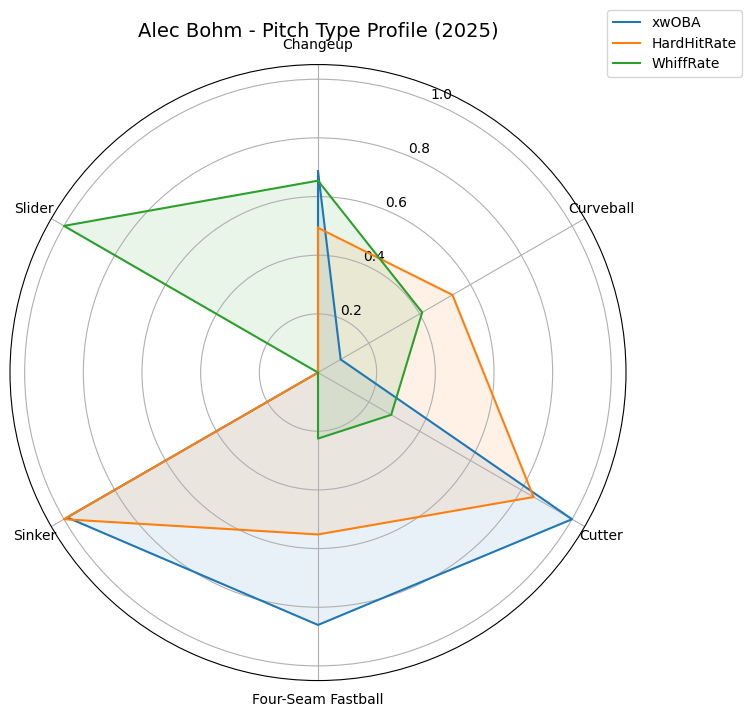

Pulling data for Weston Wilson...
Gathering Player Data


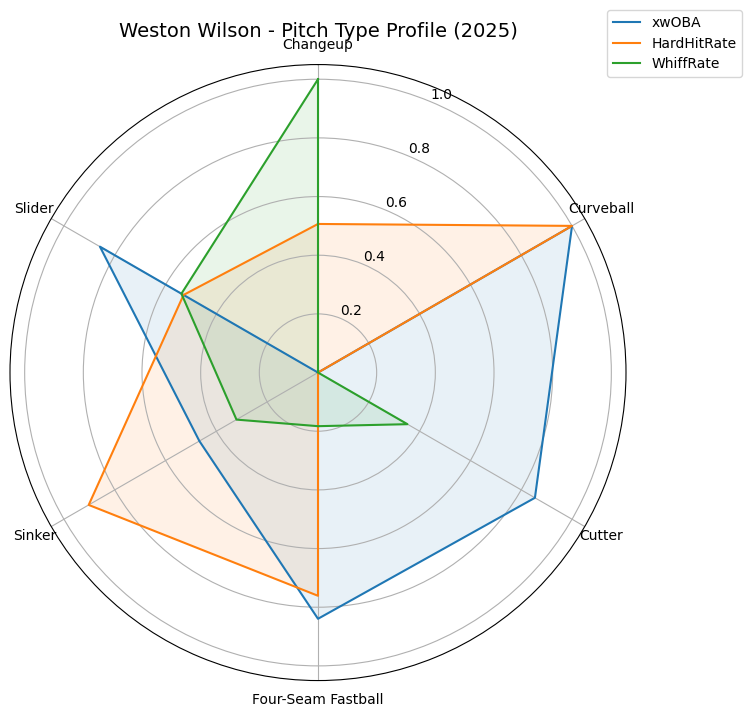

Pulling data for Otto Kemp...
Gathering Player Data


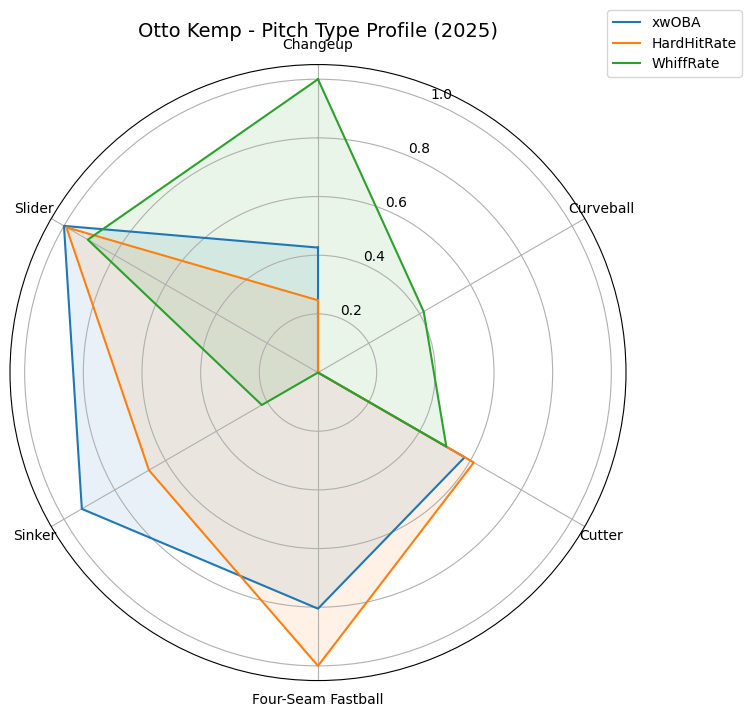

Pulling data for Edmundo Sosa...
Gathering Player Data


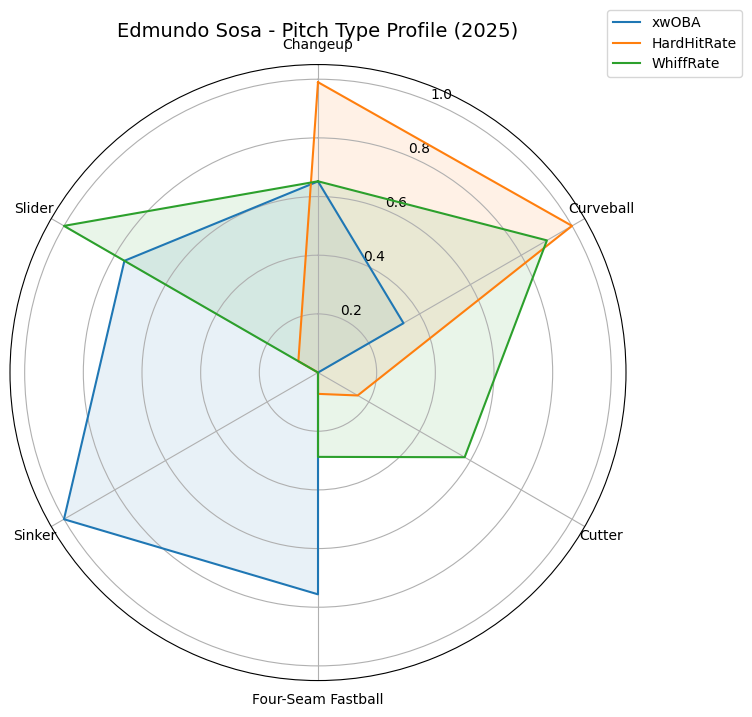

In [8]:
# Radar Chart Function
def plot_radar_chart(player_name, df):
  metrics = ['xwOBA', 'HardHitRate', 'WhiffRate']
  pitch_types = df['pitch_group'].values

  # Normalize metrics (so scales match in radar chart)
  norm_df = df.copy()
  for metric in metrics:
    max_val = df[metric].max()
    min_val = df[metric].min()
    if max_val != min_val:
      norm_df[metric] = (df[metric] - min_val) / (max_val - min_val)
    else:
      norm_df[metric] = 0.5  # constant if no variation

  # Radar chart setup
  labels = pitch_types
  num_vars = len(labels)
  angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
  angles += angles[:1]  # close circle

  fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

  for metric in metrics:
    values = norm_df[metric].tolist()
    values += values[:1]  # close circle
    ax.plot(angles, values, label=metric)
    ax.fill(angles, values, alpha=0.1)

  ax.set_theta_offset(np.pi / 2)
  ax.set_theta_direction(-1)

  ax.set_thetagrids(np.degrees(angles[:-1]), labels)
  ax.set_title(f'{player_name} - Pitch Type Profile (2025)', size=14, pad=20) # Added pad argument
  ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
  plt.show()

# Run for Phillies hitters

for name in phillies_hitters:
  first, last = name.split(" ", 1)
  mlbam_id = get_mlbam_id(first, last)

  if mlbam_id:
    print(f"Pulling data for {name}...")
    try:
      player_data = statcast_batter('2025-03-20', '2025-09-30', mlbam_id)
      summary = summarize_hitter_vs_pitch(player_data)
      if not summary.empty:
        plot_radar_chart(name, summary)
      else:
        print(f"No data for {name} in 2025.")
      time.sleep(1)
    except Exception as e:
      print(f"Error for {name}: {e}")
  else:
    print(f'MLBAM ID not found for {name}')